<h1>GOAL 4: What does a fingerprint tell us about drug-likeness? </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

<h2>Read a Dataset</h2>

In [2]:
# a dataset has descriptors and pIC50
df = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv', index_col=0)
df.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4695 entries, 0 to 4694
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  4695 non-null   object 
 1   canonical_smiles    4695 non-null   object 
 2   class               4695 non-null   object 
 3   MW                  4695 non-null   float64
 4   LogP                4695 non-null   float64
 5   NumHDonors          4695 non-null   float64
 6   NumHAcceptors       4695 non-null   float64
 7   pIC50               4695 non-null   float64
dtypes: float64(5), object(3)
memory usage: 330.1+ KB


In [4]:
logP = df['LogP']
pIC50 = df['pIC50']

<h2>Compare LogP to pIC50</h2>

<h3>pIC50</h3>

I was reading an article about logP, and the article introduced a new concept which was 'Lipophilic efficiency'.
Lipophilic efficiency (LiPE) is a parameter used in drug design and drug discovery in an attempt to estimate druglikeness. The equation to calcuate LiPE is <br>
LiPE = pIC50 - logP <br>
I studied what pIC50 is and found an interesting fact that it can also be used to predict drug-likeness. <br>
I also discovered that predicting pIC50 from molecular fingerprints is possible.

<h2>LogP vs. pIC50</h2>

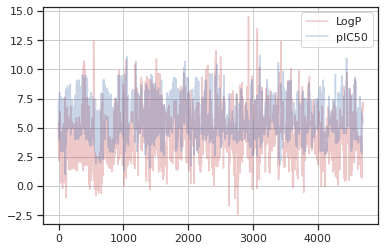

In [5]:
plt.plot(logP, 'r', label='LogP', alpha=0.3)
plt.plot( pIC50, 'b', label='pIC50', alpha=0.3)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

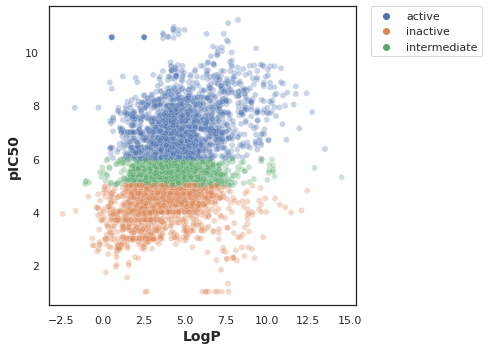

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='LogP', y='pIC50', data=df, hue='class', alpha=0.3)

plt.xlabel('LogP', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_LogP_vs_pIC50.pdf')

In [7]:
df_2class = df[df['class'] != 'intermediate']
df_2class.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910


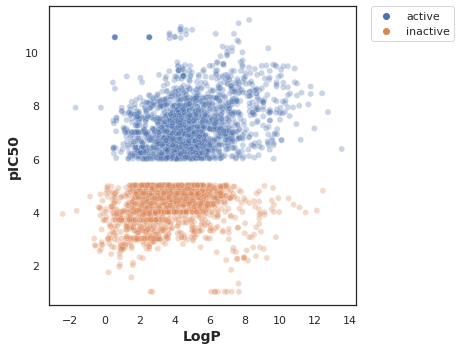

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='LogP', y='pIC50', data=df_2class, hue='class', alpha=0.3)

plt.xlabel('LogP', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_LogP_vs_pIC50.pdf')

<h2>pIC50 and drug-likeness</h2>

Text(0, 0.5, 'pIC50')

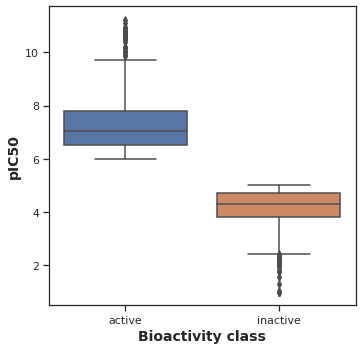

In [8]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='pIC50', data=df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')

#plt.savefig('plot_pIC50_class.pdf')

As we can observe, a molecule which has a value of pIC50 between 6 to 8 is likely to be active.

In [9]:
y = df_2class['pIC50']
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4675    3.015428
4676    2.813467
4677    3.476904
4685    6.124939
4687    6.008774
Name: pIC50, Length: 3549, dtype: float64

In [10]:
fp_3class = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_class_pubchem_fp.csv')
fp_3class.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active


In [13]:
fp_2class = fp_3class[fp_3class['class'] != 'intermediate']
pd.DataFrame(fp_2class)
fp_2class.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active


In [14]:
fp_2class['pIC50'] = y
fp_pIC50 = fp_2class.copy()
fp_pIC50.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

/tmp/ipykernel_1879/1945395524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_2class['pIC50'] = y


In [16]:
fp_2class

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class,pIC50
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,6.124939
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,7.000000
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,inactive,4.301030
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,6.522879
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,CHEMBL4284261,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,inactive,3.015428
4676,CHEMBL4276921,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,inactive,2.813467
4677,CHEMBL4292574,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,inactive,3.476904
4685,CHEMBL4292766,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,active,6.124939


check if there are any missing values.

In [18]:
fp_pIC50['pIC50'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
4675    False
4676    False
4677    False
4685    False
4687    False
Name: pIC50, Length: 3549, dtype: bool

In [19]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<h2>Train and Test a Model</h2>

In [28]:
X = fp_pIC50.drop(columns=['Name', 'pIC50', 'class'], axis=1)
y = fp_pIC50['pIC50']

print(X.shape)
print(y.shape)

(3549, 882)
(3549,)


In [29]:
from sklearn.feature_selection import VarianceThreshold

# try different threshold value to decide how many features you want to drop
def remove_low_variance(data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(data)
    return data[data.columns[selection.get_support(indices=True)]]

In [30]:
X = remove_low_variance(X, threshold=0.1)
X.shape

(3549, 221)

In [31]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h4>Random Forest Regressor</h4>

In [32]:
randForest_reg = RandomForestRegressor(n_estimators=100)
randForest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
score = randForest_reg.score(X_test, y_test)
score

0.8809918643255931

In [34]:
y_pred = randForest_reg.predict(X_test)

<h2>Error Evaluation</h2>

(array([  2.,   4.,  21.,  56., 298., 248.,  68.,  10.,   2.,   1.]),
 array([-3.02159532, -2.41382931, -1.80606331, -1.1982973 , -0.59053129,
         0.01723472,  0.62500073,  1.23276673,  1.84053274,  2.44829875,
         3.05606476]),
 <BarContainer object of 10 artists>)

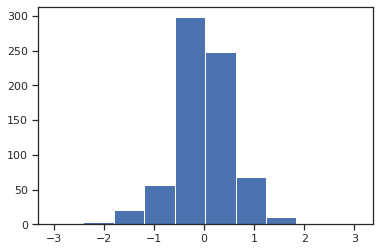

In [35]:
residuals = y_test - y_pred
plt.hist(residuals)

In [36]:
mean_squared_error(y_test, y_pred)

0.350062119245252

/home/student/miniconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

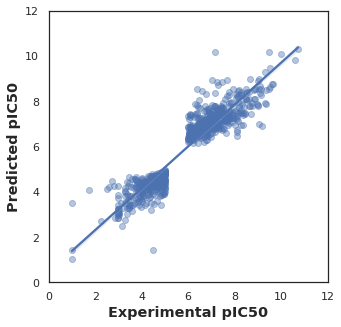

In [37]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

<h2>Conclusion</h2>

The goal of the last chapter of this ML project is to find a way to apply fingerprints to predict drug-likeness.
In the first chapter (Goal 1), we tried to produce useful results from the trained machine using molecular fingerprints. However, we were not able to comprehend the meaning of the result. That gave me homework to do; Do fingerprints tell us anything meaningful regarding drug-likeness? What is the pattern under the hood and what can we learn from it? <br>
This gave me an idea to train the machine indirectly using the fingerprints data set. <br>
I first presented that if a molecule has a value of pIC50 between 6-8, that molecule has a high chance to be classified as 'active'.
The next step is to find the 'link' between pIC50 and molecular fingerprints.
I was able to predict pIC50 faily successfully from fingerprints. Hence, from molecular fingerprints, we can predict pIC50 quite accurately (88.1%) and the result (pIC50) gives us a piece of information on drug-likeness.

<h2>Tasks for Hyeny in the Future</h2>

<ul>
    <li>Follow the steps but this time using deep learning algorithms.</li>
    <li>It would be interesting to study toxicity of a molecule in addition to drug-likeness</li>
</ul>

<h2>References</h2>

<ul>
    <li>https://en.wikipedia.org/wiki/Lipophilic_efficiency</li>
    <li>https://github.com/dataprofessor/bioinformatics_freecodecamp</li>
</ul>